# Week 4: Subspace Clustering and projected clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Theoretical questions

1. Why is traditional clustering ill-suited for high dimensional data?
1. What is the goal of subspace clustering and projected clustering?
1. Why is exhaustive subspace cluster search infeasible in practice?
1. Give a definition of what a subspace cluster is according to the models proposed by Subclu, Clique and Proclus. How are they similar and where do they differ?


1. Curse of dimensionality. Meaningful clusters cannot be detected as distances are increasingly for growing dimensionality.
1. The goal is to find subspaces, where meaningful clusters can be identified.<br> 
Let $D$ be the set of initial space dimensions. Subspace clustering algorithms aim at finding clusters at a lower-dimension $D'\subset D$.<br>
Projecting Clustering: the goal is to identify “correct” projection for each object by <br>
• starting from full space, projection to subspaces of
lower dimensionality reveals clusters<br>
• Top-down instead of bottom-up<br>
Difference: As opposed to subspace clustering, each object is assigned
to exactly one cluster (some approaches also allow a noise
“cluster”)
1. Because we usually do it for high-dimensional (say $d$ dimensions), which would require us to run a clustering algorithm in $\sim 2^d$ different subspaces.
1. **SubClu:** subset of dimensions and the clusters in those dimensions. <br>**Clique**: rectangular boxes that are connected and all dense.<br>**Proclus**: Planes to project the points onto. 

## Exercise 2: CLIQUE
1. What is a subspace cluster in CLIQUE?
1. How is monotonicity used in CLIQUE?
1. Implement and then use the CLIQUE algorithm to compute the hidden subspace clusters in the following 6 dimensional data set.
    Compute the first step of the CLIQUE algorithm to detect dense cells. Use 3 equal intervals
    per dimension in the domain 0...100 (number of intervals $\xi = 3$) and consider a cell as dense
    if it contains at least 5 objects (density threshold $\tau = 21\%$).
   

**Answer**
1. It's subspace defined by grid based approach wirh density threshold $\tau$
1. A region $r$ dense in $k$-dimensional spase $s$, then any projection of $r$ into a $(k-1)$-dimensional subspace $s$ is dense.

In [12]:
# Dim1 Dim2 Dim3 Dim4 Dim5 Dim6
X = np.array([
    [6, 23, 22, 21, 31, 49],
    [7, 22, 21, 20, 51, 76],
    [26, 85, 75, 52, 53, 50],
    [28, 94, 76, 63, 76, 87],
    [29, 45, 93, 51, 54, 51],
    [35, 73, 76, 51, 52, 50],
    [38, 23, 22, 21, 33, 61],
    [41, 22, 21, 21, 32, 99],
    [56, 15, 66, 39, 36, 66],
    [58, 1, 14, 53, 52, 51],
    [66, 1, 40, 19, 86, 13],
    [70, 90, 25, 32, 70, 65],
    [71, 23, 21, 20, 3, 81],
    [80, 19, 42, 23, 57, 1],
    [82, 80, 6, 54, 81, 81],
    [82, 81, 38, 35, 81, 82],
    [82, 81, 77, 57, 81, 82],
    [82, 83, 44, 59, 81, 83],
    [82, 81, 35, 86, 81, 81],
    [84, 80, 66, 10, 81, 81],
    [86, 33, 59, 51, 54, 50],
    [89, 34, 36, 53, 54, 51],
    [92, 25, 27, 40, 14, 22]
])

23 6
Clusters [{'dim': 0, 'clusters': [(66, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}, {'dim': 3, 'clusters': [(0, 66)]}, {'dim': 4, 'clusters': [(33, 99)]}, {'dim': 5, 'clusters': [(33, 99)]}]


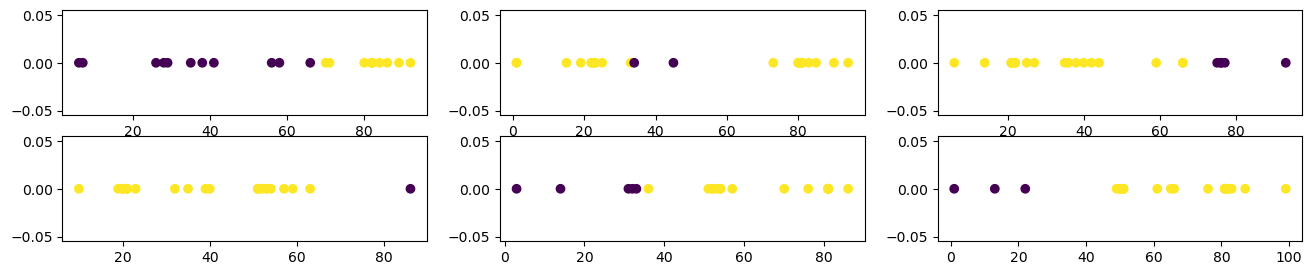

In [14]:
n, d = X.shape #dimensions
print(n, d)
starts = range(0, 100, 100 // 3) #range numbers from 0 to 100 with step 33
tau = 5 #𝜏 constraint parameter

clusters = [] #list of clusters
for i in range(d): #for each dimension d
    X_ = X[:,i] #select the d dimension of each data
    dense_regions = [] #list of# dense regions
    for start in starts: #range numbers from 0 to 100 with step 33
        cnt = ((X_ > start) * (X_ <= start + 100 // 3)).sum() #count the total number of data points inside the area of interest
        if cnt > tau: #if it contains more than 𝜏 points
            dense_regions.append((start, start + 100//3)) #Region is dense 
        
    #Simple way to choose the three clusters.
    clust = [] #list of clusters
    if len(dense_regions) == 0: continue
    if len(dense_regions) == 1: clust.append(dense_regions[0]) 
    if len(dense_regions) == 2:
        if dense_regions[0][1] == dense_regions[1][0]: #if the two regions are "neighbors" 
            clust.append((dense_regions[0][0], dense_regions[1][1])) #merge the two regions
        else:
            clust.append(dense_regions[0])
            clust.append(dense_regions[1])
    if len(dense_regions) == 3:
        clust.append((dense_regions[0][0], dense_regions[2][1]))
    clusters.append({'dim': i, 'clusters': clust})

#prints and plots
print('Clusters', clusters)
fig, ax = plt.subplots(2, 3, figsize=(16, 3))
for i in range(2):
    for j in range(3):
        c = clusters[i*3 + j]
        dim = c['dim']
        cl = c['clusters']
        X_ = X[:,dim]
        y = np.zeros((n,))
        for cs in cl: y[((X_>cs[0]) * (X_<=cs[1]))==1] = 1
        ax[i, j].scatter(X_, np.zeros((n,)), c=y)

## Exercise 3: PROCLUS

Consider the following four-dimensional data set:

In [4]:
X = np.array([
    ( 15 , 12 , 16 ,  9 ),  # A
    ( 14 , 13 , 18 ,  3 ),  # B
    ( 12 , 14 , 14 , 15 ),  # C 
    ( 16 , 13 , 19 , 19 ),  # D 
    (  5 ,  6 ,  9 ,  4 ),  # E 
    (  4 , 11 , 10 , 18 ),  # F 
    (  6 , 17 ,  8 , 13 ),  # G 
    (  6 ,  9 , 14 , 16 ),  # H 
    ( 14 , 19 , 13 , 15 ),  # I 
    ( 19 ,  3 , 15 , 14 ),  # J 
])

Calculate the following steps of a PROCLUS clustering using $k=3$ clusters. 
Please use the complete data set in the Algorithm (no sample; $A=\frac{10}{3}$).

1. Compute the set of medoids M.
1. Compute the locality and $Z_{ij}$ values for each medoid.
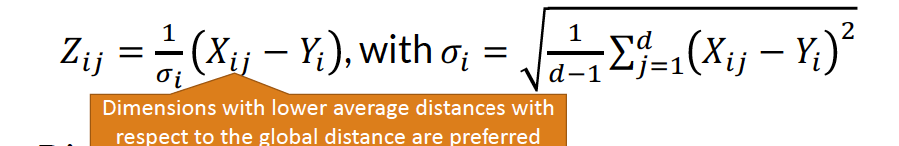
1. Determine the optimal dimension set $D_i$ for each medoid $m_i$ (use $l=3$).
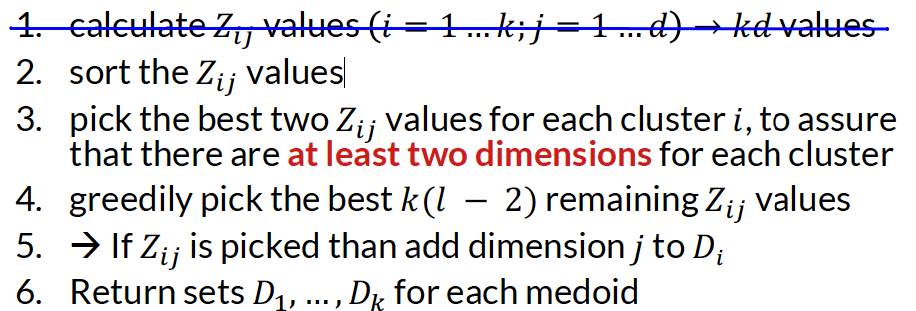

In [5]:
np.random.seed(0)
n, d = X.shape #dimensions
k = 3 #number of clusters
A = 10 / 3. #percentage of sampled data
num_of_medods =  3 #number of medoids
l = 3 #average number of dimensions

#1. find the medoids
M = [np.random.randint(0, X.shape[0])] #select a starting point at random  
print('Initial index of (medoid) point M = ',M)
L1 = lambda x, y: np.sum(np.abs(x-y)) #L1 norm

while len(M) < num_of_medods: 
    dists = [0 if i in M else min([L1(X[i], X[j]) for j in M]) for i in range(n)] #for each element we save the minimum L1 distance from a medoid 
    print(f'Min L1 distances: {dists}')
    next_idx = np.argmax(dists) #select the point with the further distance
    M.append(next_idx)

M  = np.array(M)
Ms = X[M]
print("1. Selected medoids, indexes in X and vectors:")
print(M)
print(Ms)

# 2. compute Zijs
Z = np.zeros((k, d)) #
for i, m in enumerate(Ms):
    delta = min([L1(m, m_) for j, m_ in enumerate(Ms) if not i == j]) 
    Li = np.array([x for x in X if L1(m, x) <= delta]) #locality
    Xij = np.abs(m-Li).mean(axis=0)
    Yi = np.mean(Xij)
    std = np.sqrt(((Xij-Yi)**2 / (d-1)).sum())
    Zij = (Xij - Yi) / std #Zij
    Z[i] = Zij

print("\n2. Zijs for the first three medoids")
print(Z)

# 3. Determine optimal dimensions
dims = []
for i in range(k):
    ordered_idxs = np.argsort(Z[i]) #step 2
    first_dims = list(ordered_idxs[:2]) #step 3
    dims.append(first_dims)
    Z[i,first_dims[0]] = float('inf') # Some high value such that the dimension will not be chosen again
    Z[i,first_dims[1]] = float('inf') # Some high value such that the dimension will not be chosen again
    
print("\n3. Identifying dimensions")
print("Dimensions after assigning the two best dimensions to each medoid:", len(dims))
missing_dims = k * (l-2)
print("Need to another %i dimensions to have l * k dimensions in total" % missing_dims)

Z_flat = Z.reshape(-1)
ordered_idxs = np.argsort(Z_flat) #order indexes
for idx in ordered_idxs[:missing_dims]: #step 4-5
    i, j = idx // 4, idx % 4
    dims[i].append(j) 

print("Chosen dimensions for the first three medoids")
print(dims) #step 6

Initial index of (medoid) point M =  [5]
Min L1 distances: [27, 35, 18, 24, 21, 0, 15, 10, 24, 32]
Min L1 distances: [10, 0, 18, 19, 21, 0, 15, 10, 23, 29]
1. Selected medoids, indexes in X and vectors:
[5 1 9]
[[ 4 11 10 18]
 [14 13 18  3]
 [19  3 15 14]]

2. Zijs for the first three medoids
[[ 1.45381025 -0.61737148 -0.69703231 -0.13940646]
 [-0.54611796 -0.45316171 -0.49963983  1.4989195 ]
 [ 0.14100418  1.31603904 -1.03403068 -0.42301255]]

3. Identifying dimensions
Dimensions after assigning the two best dimensions to each medoid: 3
Need to another 3 dimensions to have l * k dimensions in total
Chosen dimensions for the first three medoids
[[2, 1, 3], [0, 2, 1], [2, 3, 0]]


## Exercise 4: OPTICS 
Use **sklearn** package to run the Optics algorithm for the following 2-d data set.
Use Manhattan distance, $minpts=6$ and $\epsilon = 1$. Print and draw reachability distances along with the clusters.

In [6]:
X = np.array([ 
    (2,0),(2,0),(3,0),(3,0),(3,0),(3,0),(4,0),(4,0),(3,1),(3,1),(3,1),
    (4,1),(4,1),(4,1),(0,4),(0,4),(0,5),(0,5),(1,4),(1,4),(1,5),(1,5),
    (2,4),(3,4),(3,4),(3,5),(3,5),(3,5),(4,4),(4,4),(4,5),(4,5),(4,5)
])

Reachability dists:  [inf  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  3.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]


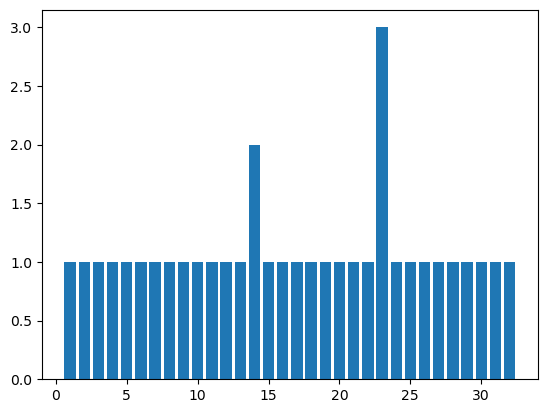

In [7]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=6, metric='manhattan', eps=1, cluster_method='dbscan').fit(X)
labels = clustering.labels_
reachabilty_dists = clustering.reachability_
fig, ax = plt.subplots(1,1)
ax.bar(np.arange(len(X)), reachabilty_dists)

print('Reachability dists: ', reachabilty_dists)
print('Labels: ', labels)

Given the resulting OPTICS plot, which two settings $\epsilon=1,2$ correspond to a DBSCAN (use sklearn) that outputs
two and three clusters, respectively?

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=1, min_samples=6).fit(X)
print(clustering.labels_)
clustering = DBSCAN(eps=2, min_samples=6).fit(X)
print(clustering.labels_)
print()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



## Exercise 5: BIRCH/CF-Tree
Insert the following points into an empty CF-Tree and compute the micro clusters and associated cluster features  (use the diameter D = 2R).

1. $P_1=(5,5)$ 
1. $P_2=(2,2)$
1. $P_3=(4,5)$
1. $P_4=(1,4)$
1. $P_5=(2,1)$.

The tree parameters are: $B=2$ (max number of entries in an internal node), $L=2$ (max number of entries in a leaf node), $T=2$ (the minimum threshold of the diameter of all entries in a leaf node).
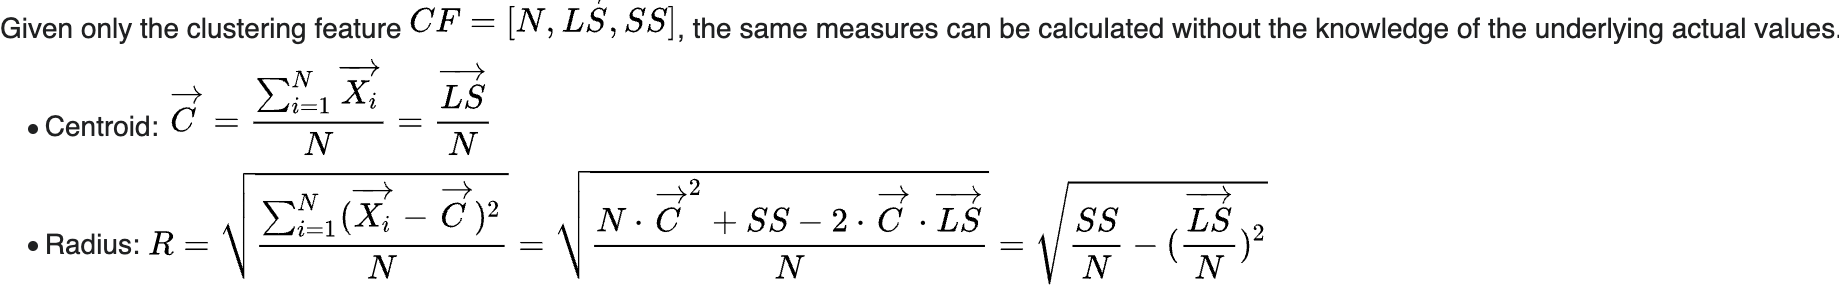


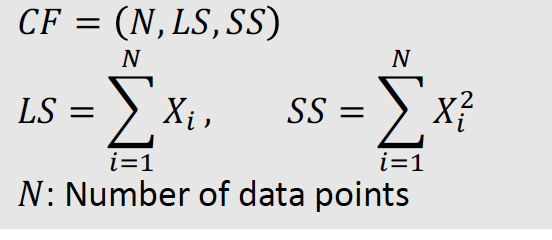

In [9]:
def radius(N1, N2, LS1, LS2, SS1, SS2):
    tmp = ( (SS1 + SS2)/(N1 + N2) - (LS1+LS2).T @ (LS1 + LS2)/(N1 + N2)**2 )
    return np.sqrt(tmp)

def diameter(N1, N2, LS1, LS2, SS1, SS2):
    return 2*radius(N1, N2, LS1, LS2, SS1, SS2)

def cf(X):
    return X.shape[0], X.sum(0), (X**2).sum()

def d(X1, X2):
    N1, LS1, SS1 = cf(X1)
    N2, LS2, SS2 = cf(X2)
    return diameter(N1, N2, LS1, LS2, SS1, SS2)

def dist(X1, X2):
    N1, LS1, SS1 = cf(X1)
    N2, LS2, SS2 = cf(X2)
    m1 = LS1 / N1
    m2 = LS2 / N2
    diff = m1 - m2
    return np.sqrt(np.dot(diff, diff))

X1 = np.array([[5,5],])
X2 = np.array([[2,2],])
X3 = np.array([[4,5]])
X4 = np.array([[1,4]])
X5 = np.array([[2,1]])


# 1
print("\n", " - " * 3, "Step 1" , " - " * 3)
print(f'Inserting X1 = {X1}')
Node1 = X1
print(f'Node1 = {Node1}')
print(f'CF1 = {cf(Node1)}\n')

# 2
print("\n", " - " * 3, "Step 2" , " - " * 3)
print(f'Inserting X2 = {X2}')
print(f'Distance and Diameter of [Node1,X2] is: {dist(Node1, X2)} | {d(Node1, X2)}>2')
print(f'Thus we insert X2 to a different node.')
Node2 = X2
print(f'Node2 = {Node2}')
print(f'CF2 = {cf(Node2)}\n')


# 3
print("\n", " - " * 3, "Step 3" , " - " * 3)
print(f'Inserting X3 = {X3}')
print(f'Distance and Diameter of [Node1,X3] is: {dist(Node1, X3)} | {d(Node1, X3)}<2')
print(f'Distance and Diameter of [Node2,X3] is: {dist(Node1, X3)} | {d(Node1, X3)}<2')
print(f'Thus we insert X3 into Node1.')
Node1 = np.concatenate([Node1, X3], axis=0)
print(f'Updated Node1:\n {Node1}')
print(f'Updated CF1 = {cf(Node1)}\n')


# 4
print("\n", " - " * 3, "Step 4" , " - " * 3)
print(f'Inserting X4 = {X4}')
print(f'Distance and Diameter of [Node1,X4] is: {dist(Node1, X4)} | {d(Node1, X4)}>2')
print(f'Distance and Diameter of [Node2,X4] is: {dist(Node2, X4)} | {d(Node2, X4)}>2')
print(f'Thus we insert X4 to a different node.')
print()
Node3 = X4
print(f'Node3 = {Node3}')
print(f'CF3 = {cf(Node3)}\n')

print(f'Since L>2 we split the leaf-node.')
print("Distance of Node1 with Node3:", dist(Node1, Node3))
print("Distance of Node2 with Node3:", dist(Node2, Node3))
print("Distance of Node1 with Node2:", dist(Node1, Node2))
print()
print(f'So root node with two root-nodes:\n Rnode1 has Node1 as child, and\n Rnode2 has Node2 and Node3 as children')
Rnode1 = Node1
Rnode2 = np.concatenate([Node2, Node3], axis=0)
print(f'Rnode1:\n {Rnode1}')
print(f'Rnode2:\n {Rnode2}')

# 5
print("\n", " - " * 3, "Step 5" , " - " * 3)
print(f'Inserting X5 = {X5}')
print("Distance of Rnode1 with X5:", dist(Rnode1, X5))
print("Distance of Rnode2 with X5:", dist(Rnode2, X5))
print()
print("So we check Rnode2...")
print(f'Distance and Diameter of [Node2,X5] is: {dist(Node2, X5)} | {d(Node2, X5)}<2')
print(f'Distance and Diameter of [Node3,X5] is: {dist(Node3, X5)} | {d(Node3, X5)}>2')
print()
print(f'Thus we insert X5 into Node2.')
Node2 = np.concatenate([Node2, X5], axis=0)
print(f'Updated Node2:\n {Node2}')


  -  -  -  Step 1  -  -  - 
Inserting X1 = [[5 5]]
Node1 = [[5 5]]
CF1 = (1, array([5, 5]), 50)


  -  -  -  Step 2  -  -  - 
Inserting X2 = [[2 2]]
Distance and Diameter of [Node1,X2] is: 4.242640687119285 | 4.242640687119285>2
Thus we insert X2 to a different node.
Node2 = [[2 2]]
CF2 = (1, array([2, 2]), 8)


  -  -  -  Step 3  -  -  - 
Inserting X3 = [[4 5]]
Distance and Diameter of [Node1,X3] is: 1.0 | 1.0<2
Distance and Diameter of [Node2,X3] is: 1.0 | 1.0<2
Thus we insert X3 into Node1.
Updated Node1:
 [[5 5]
 [4 5]]
Updated CF1 = (2, array([ 9, 10]), 91)


  -  -  -  Step 4  -  -  - 
Inserting X4 = [[1 4]]
Distance and Diameter of [Node1,X4] is: 3.640054944640259 | 3.5276684147527892>2
Distance and Diameter of [Node2,X4] is: 2.23606797749979 | 2.23606797749979>2
Thus we insert X4 to a different node.

Node3 = [[1 4]]
CF3 = (1, array([1, 4]), 17)

Since L>2 we split the leaf-node.
Distance of Node1 with Node3: 3.640054944640259
Distance of Node2 with Node3: 2.23606797749979
Dis

# Optional Exercises

## Exercise 6: SUBCLU
1. What is a subspace cluster in SUBCLU?
1. How is the monotonicity used in SUBCLU?

**Answer**
1. It's subspace is defined by density reachability and connectivity defined from core point.
1. It's obey monotonicity of density connectivity. If two points are density-connected in $k$-dimensional spase $s$, all their projections on $(k-1)$-dimensional subspace also density-connected.

## Exercise 7: Proving Property of BIRCH 
In BIRCH [1], they claim that the the _average intra-cluster distance_ $D3$ can be computed efficiently and exactly from the clustering feature (CF) of two clusters. 
We aim to prove that claim here.

The average intra-cluster distance is defined as follows. 
Given $N_1$ d-dimensional data points in cluster: $C_1 = \{ X_i \}$ where $i = 1, \dots, N_1$, and $N_2$ datapoints in another cluster: $C_2 = \{ X_j \}$ where $j = N_1 + 1, \dots, N_1 + N_2$, 

$$
D3(C1, C2) =\left(\frac{\sum_{i=1}^{N_{1}+N_{2}} \sum_{j=1}^{N_{1}+N_{2}}\left(X_{i}-X_{j}\right)^{2}}{\left(N_{1}+N_{2}\right)\left(N_{1}+N_{2}-1\right)}\right)^{\frac{1}{2}} \qquad\quad\quad (1)
$$

and the CF for cluster $i$ is defined as a triple $CF_i = (N_i, LS_i, SS_i)$, where $LS_i = \sum_{j=1}^{N_i} X_j$ and $SS_i = \sum_{j=1}^{N_i} X_j^2$.

1. Given two CFs, $CF_1$ and $CF_2$, for clusters $C_1$ and $C_2$, respectively, show that $D3(C_1, C_2)$ can becomputed only from information in $CF_1$ and $CF_2$.
2. Compare the running times of Equation (1) and you derived algorithm. Which one is faster?

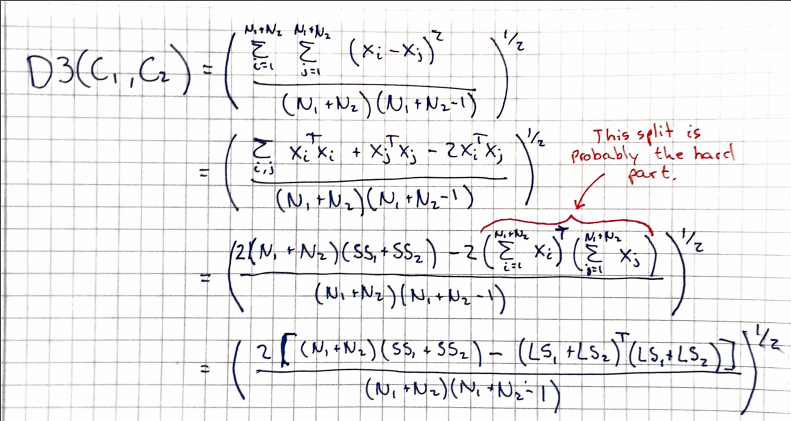

If you want, you could test your derived formula here. Look for the _TODO_ below.

Testing slow algorithm
Size 10: 	0.000035 secs.
Size 110: 	0.001312 secs.
Size 210: 	0.004945 secs.
Size 310: 	0.010153 secs.
Size 410: 	0.017339 secs.
Size 510: 	0.026780 secs.
Size 610: 	0.037774 secs.
Size 710: 	0.051294 secs.
Size 810: 	0.066406 secs.
Size 910: 	0.083958 secs.
Size 1010: 	0.103474 secs.
Testing fast algorithm
Size 10: 	0.000029 secs.
Size 110: 	0.000029 secs.
Size 210: 	0.000035 secs.
Size 310: 	0.000034 secs.
Size 410: 	0.000038 secs.
Size 510: 	0.000040 secs.
Size 610: 	0.000045 secs.
Size 710: 	0.000048 secs.
Size 810: 	0.000050 secs.
Size 910: 	0.000054 secs.
Size 1010: 	0.000057 secs.

|  i  | Fast      | Slow      |
-------------------------------
|  10 |   0.00003 |   0.00004 |
| 110 |   0.00003 |   0.00131 |
| 210 |   0.00003 |   0.00495 |
| 310 |   0.00003 |   0.01015 |
| 410 |   0.00004 |   0.01734 |
| 510 |   0.00004 |   0.02678 |
| 610 |   0.00004 |   0.03777 |
| 710 |   0.00005 |   0.05129 |
| 810 |   0.00005 |   0.06641 |
| 910 |   0.00005 |   0.08396

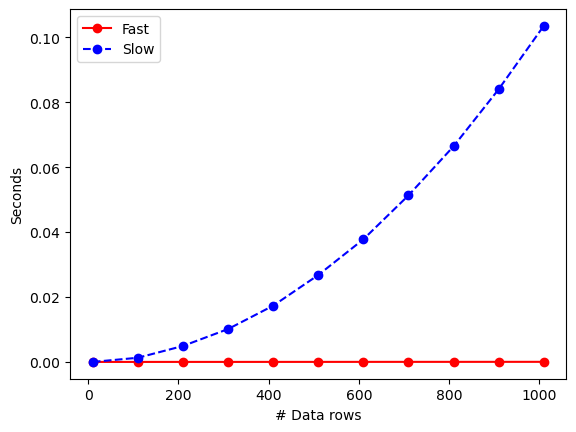

In [10]:
# D3 the slow way
import time
from tqdm import tqdm
fast = True
# Cluster statistics
def D3_slow(C1, C2): # Slow algorithm
    C = np.concatenate([C1, C2], axis=0)
    s = 0.
    
    N1, d = C1.shape
    N2, _ = C2.shape
    N,  _ = C.shape
    
    if fast: # Fast version of the slow algorithm
        C_ = C.reshape(N, 1, d)
        C  = C.reshape(1, N, d)
        D  = (C_ - C).reshape(N*N, 1, d)
        s  = (D @ D.reshape(N*N, d, 1)).sum()
    else: # Slow version of the slow algorithm
        for i in range(N):
            for j in range(N):
                s += np.dot((C[i] - C[j]), (C[i] - C[j]))

    s = s / ((N1 + N2)*(N1 + N2 -1))
    return np.sqrt(s)

# Statistics for fast implementation
LS = lambda C: np.sum(C, axis=0)
SS = lambda C: np.sum(C ** 2)

# TODO implement fast way:
def D3_fast(C1, C2):
    N1, _ = C1.shape
    N2, _ = C2.shape
    LS1, SS1 = LS(C1), SS(C1)
    LS2, SS2 = LS(C2), SS(C2)

    return np.sqrt((2*((N1 + N2)*(SS1 + SS2) - np.dot((LS1 + LS2), (LS1 + LS2)))) / ((N1 + N2)*(N1 + N2 - 1)))    
    return 0 # TODO return DS3


# Generate random samples in two different clusters.
# Check that the two algorithms give the same result.
size = 4
C1 = np.random.randn(size, 2) * 0.5 
C2 = np.random.randn(size, 2) * 0.5 + 2
assert np.allclose(D3_slow(C1, C2), D3_fast(C1, C2))

## TEST running time for the two algorithms
repeats     = 20   # Average running time over `repeats` time.
size_from   = 10   # Data set size from
size_to     = 1010  # Dataset size to
size_step   = 100   # Step size
data_sizes  = range(size_from, size_to + 1, size_step) # Test sizes

def test(fn):
    times = []
    results = []
    
    for size in data_sizes:
        C1 = np.random.randn(size, 2) * 0.5 
        C2 = np.random.randn(size, 2) * 0.5 + 2
        
        t0 = time.time()
        for _ in range(repeats): 
              print(f'\rSize {size}: {1+_}/{repeats}', end="")
              t = fn(C1, C2)
        td = time.time() - t0
        print(f"\rSize {size}: \t{td / repeats:.6f} secs.")
        results.append(t)
        times.append(td / repeats)
    return times, results

print("Testing slow algorithm")
slows, slow_res = test(D3_slow)
print("Testing fast algorithm")
fasts, fast_res = test(D3_fast)

print("\n|  i  | %-9s | %-9s |" % ('Fast', 'Slow'))
print("-"*31)
for i, st, sr, ft, fr in zip(data_sizes, slows, slow_res, fasts, fast_res):
    print("| %3i | %9.5f | %9.5f |" % (i, ft, st))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(data_sizes, fasts, 'r-o', label="Fast")
ax.plot(data_sizes, slows, 'b--o', label="Slow")
ax.set_ylabel('Seconds')
ax.set_xlabel('# Data rows')
ax.legend()

#### References:
[1] Zhang, T., Ramakrishnan, R. and Livny, M., 1996. BIRCH: an efficient data clustering method for very large databases. ACM Sigmod Record, 25(2), pp.103-114.